# Feature Engineering: Predicting sales outcome

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.utils import resample

In [2]:
import types 
from botocore.client import Config 
import ibm_boto3 
def __iter__(self): return 0 
# @hidden_cell 
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials. 
# You might want to remove those credentials before you share the notebook. 
client_d812e9ff73554acb99ec832832ddfe49 = ibm_boto3.client(service_name='s3', 
                                                           ibm_api_key_id='-rPWCJ6tlad28m4TQMS_rhBCiHbQ4d2agItYcfqgqzen', 
                                                           ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token", 
                                                           config=Config(signature_version='oauth'), 
                                                           endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')
body = client_d812e9ff73554acb99ec832832ddfe49.get_object(Bucket='progpy19cabd749c62e43b992119d84b67f744f',Key='Modeling Data Set for XYZ.xlsx')['Body'] 
# add missing __iter__ method, so pandas accepts body as file-like object 
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body ) 
df_data_1 = pd.read_excel(body)

In [19]:
df_data_0 = df_data_1 # We store the data in df_data_0 so that during coding if we change df_data_0 and it we need to reload data again,
                               #we can simply start from here rather than loading the once again.

In [20]:
#Data cleansing process involved several process such as checking emptiness, statistical properties, duplication, null values, shapes etc
df_data_0.head()
df_data_0.describe()
df_data_0.duplicated().sum()
df_data_0.empty
df_data_0.isna().sum()
Row, Col = df_data_0.shape
print(f'The Data has {Row} rows and {Col} columns.')

    

The Data has 161465 rows and 36 columns.


In [21]:
#Filtering out the null values as we have enough data and we don't need to compromise with the data quality by incorporating data imputation.
df_data_0 = df_data_0.dropna(axis=0, how='any')
df_data_0

,KEY,OPP_Natural Age,Age since SSM Validated,Age before SSM Validated,SSM_1 _ELXAPSED_DAYS,SSM_2 _ELXAPSED_DAYS,SSM_3 _ELXAPSED_DAYS,SSM_4 _ELXAPSED_DAYS,SSM_5 _ELXAPSED_DAYS,OPP_Backward count,...,Not_Roller_FLXAg,SAXMe_Quarter_Updater_FLXAg,Deal_Accelerator_FLXAg,One_Time_Roller_FLXAg,Record_Count,AGE_FLXAG,OUTCOME,BU_CODE,G_BU,Partition
0,23226186,49,49,0,0,0,0,0,49,0,...,1.0,0.0,0.0,0.0,1,1,0,XYZ,EXP_XYZ,1_Training
1,23244325,42,42,0,0,0,0,42,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,AXM_XYZ,1_Training
2,23235268,45,45,0,0,0,0,45,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,JXN_XYZ,1_Training
3,23235330,135,135,0,0,0,0,135,0,0,...,0.0,0.0,0.0,0.0,1,1,1,XYZ,CXG_XYZ,2_Testing
4,23235456,44,44,0,0,0,44,0,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,AXS_XYZ,2_Testing
5,23236123,44,44,0,0,0,11,33,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,JXN_XYZ,1_Training
6,23236219,136,63,73,0,73,63,0,0,0,...,0.0,0.0,0.0,1.0,1,1,1,XYZ,AXM_XYZ,2_Testing
7,23236893,44,44,0,0,0,0,44,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,AXM_XYZ,1_Training
8,23237142,44,44,0,0,0,44,0,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,EXP_XYZ,2_Testing
9,23237643,44,44,0,0,0,0,44,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,AXM_XYZ,1_Training


In [22]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(df_data_0['G_BU'])
df_data_0['G_BU_transform'] = enc.transform(df_data_0['G_BU'])
df_data_0.columns

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Index(['KEY', 'OPP_Natural Age', 'Age since SSM Validated',
       'Age before SSM Validated', 'SSM_1 _ELXAPSED_DAYS',
       'SSM_2 _ELXAPSED_DAYS', 'SSM_3 _ELXAPSED_DAYS', 'SSM_4 _ELXAPSED_DAYS',
       'SSM_5 _ELXAPSED_DAYS', 'OPP_Backward count', 'OPP_Forward count',
       'DTL_Natural Age', 'RM_STATUS_Count', 'RdM_NIR_ELXAPSED_DAYS',
       'RdM_STR_ELXAPSED_DAYS', 'RdM_KEY_ELXAPSED_DAYS',
       'RdM_ATR_ELXAPSED_DAYS', 'RdM_SOL_ELXAPSED_DAYS', 'RdM_WNR_DAYS',
       'RdM_NonWNR_DAYS', 'RdM_Forward count', 'RdM backward count',
       'Forward quarter_count', 'Backward quarter_count', 'Roller_FLXAg_NUM',
       'Chronic_Roller_FLXAg', 'Not_Roller_FLXAg',
       'SAXMe_Quarter_Updater_FLXAg', 'Deal_Accelerator_FLXAg',
       'One_Time_Roller_FLXAg', 'Record_Count', 'AGE_FLXAG', 'OUTCOME',
       'BU_CODE', 'G_BU', 'Partition', 'G_BU_transform'],
      dtype='object')

In [23]:
#Data comes with a column 'Partition' that indicates a segregates between Training data and Test data. This is done to compare results with others
#Select the training data.
df_data_train = df_data_0[df_data_0['Partition'] == "1_Training"]
df_data_train

,KEY,OPP_Natural Age,Age since SSM Validated,Age before SSM Validated,SSM_1 _ELXAPSED_DAYS,SSM_2 _ELXAPSED_DAYS,SSM_3 _ELXAPSED_DAYS,SSM_4 _ELXAPSED_DAYS,SSM_5 _ELXAPSED_DAYS,OPP_Backward count,...,SAXMe_Quarter_Updater_FLXAg,Deal_Accelerator_FLXAg,One_Time_Roller_FLXAg,Record_Count,AGE_FLXAG,OUTCOME,BU_CODE,G_BU,Partition,G_BU_transform
0,23226186,49,49,0,0,0,0,0,49,0,...,0.0,0.0,0.0,1,1,0,XYZ,EXP_XYZ,1_Training,4
1,23244325,42,42,0,0,0,0,42,0,0,...,0.0,0.0,0.0,1,1,1,XYZ,AXM_XYZ,1_Training,0
2,23235268,45,45,0,0,0,0,45,0,0,...,0.0,0.0,0.0,1,1,1,XYZ,JXN_XYZ,1_Training,5
5,23236123,44,44,0,0,0,11,33,0,0,...,0.0,0.0,0.0,1,1,1,XYZ,JXN_XYZ,1_Training,5
7,23236893,44,44,0,0,0,0,44,0,0,...,0.0,0.0,0.0,1,1,1,XYZ,AXM_XYZ,1_Training,0
9,23237643,44,44,0,0,0,0,44,0,0,...,0.0,0.0,0.0,1,1,1,XYZ,AXM_XYZ,1_Training,0
10,23238153,44,44,0,0,0,44,0,0,0,...,0.0,0.0,0.0,1,1,1,XYZ,AXM_XYZ,1_Training,0
11,23238871,134,134,0,0,0,134,0,0,0,...,0.0,0.0,1.0,1,1,1,XYZ,JXN_XYZ,1_Training,5
13,23229687,139,105,34,0,0,6,133,0,1,...,0.0,0.0,0.0,1,1,1,XYZ,JXN_XYZ,1_Training,5
15,23209361,146,146,0,0,0,146,0,0,0,...,0.0,0.0,0.0,1,1,1,XYZ,EXP_XYZ,1_Training,4


In [25]:
#Drop the columns not going to be used for the Modelling. Rest of the fields are numeric and going to be used during modelling.
df_data_train = df_data_train.drop(['BU_CODE','Partition', 'G_BU', 'KEY'], axis = 1)
df_data_train.columns

Index(['OPP_Natural Age', 'Age since SSM Validated',
       'Age before SSM Validated', 'SSM_1 _ELXAPSED_DAYS',
       'SSM_2 _ELXAPSED_DAYS', 'SSM_3 _ELXAPSED_DAYS', 'SSM_4 _ELXAPSED_DAYS',
       'SSM_5 _ELXAPSED_DAYS', 'OPP_Backward count', 'OPP_Forward count',
       'DTL_Natural Age', 'RM_STATUS_Count', 'RdM_NIR_ELXAPSED_DAYS',
       'RdM_STR_ELXAPSED_DAYS', 'RdM_KEY_ELXAPSED_DAYS',
       'RdM_ATR_ELXAPSED_DAYS', 'RdM_SOL_ELXAPSED_DAYS', 'RdM_WNR_DAYS',
       'RdM_NonWNR_DAYS', 'RdM_Forward count', 'RdM backward count',
       'Forward quarter_count', 'Backward quarter_count', 'Roller_FLXAg_NUM',
       'Chronic_Roller_FLXAg', 'Not_Roller_FLXAg',
       'SAXMe_Quarter_Updater_FLXAg', 'Deal_Accelerator_FLXAg',
       'One_Time_Roller_FLXAg', 'Record_Count', 'AGE_FLXAG', 'OUTCOME',
       'G_BU_transform'],
      dtype='object')

In [26]:
#Lets check for the distribution of target/outcome
a = df_data_train[df_data_train['OUTCOME'] == 1].count()[1]
b = df_data_train[df_data_train['OUTCOME'] == 0].count()[1]
a1 = a/(a+b)*100
b1 = b/(a+b)*100
print('Rows with 1 outcome is:', a)
print('Rows with 0 outcome is:', b)
print('Percentage of rows with 1 outcome is:', round(a1),'%')
print('Percentage of rows with 0 outcome is:', round(b1),'%')

Rows with 1 outcome is: 51113
Rows with 0 outcome is: 28864
Percentage of rows with 1 outcome is: 64.0 %
Percentage of rows with 0 outcome is: 36.0 %


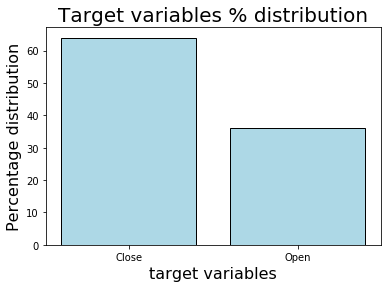

In [28]:
#Graph for target distribution , wher close is '0' and open is '1'. The business understand epxects these two be in the same proportion as per historical analysis.
Percentage_distribution = [round(a1),round(b1)]
target_variables = ['Close', 'Open']
pos = np.arange(len(target_variables))
plt.bar(pos,Percentage_distribution,color='lightblue',edgecolor='black')
plt.xticks(pos, target_variables)
plt.xlabel('target variables', fontsize=16)
plt.ylabel('Percentage distribution', fontsize=16)
plt.title('Target variables % distribution',fontsize=20)
plt.show()

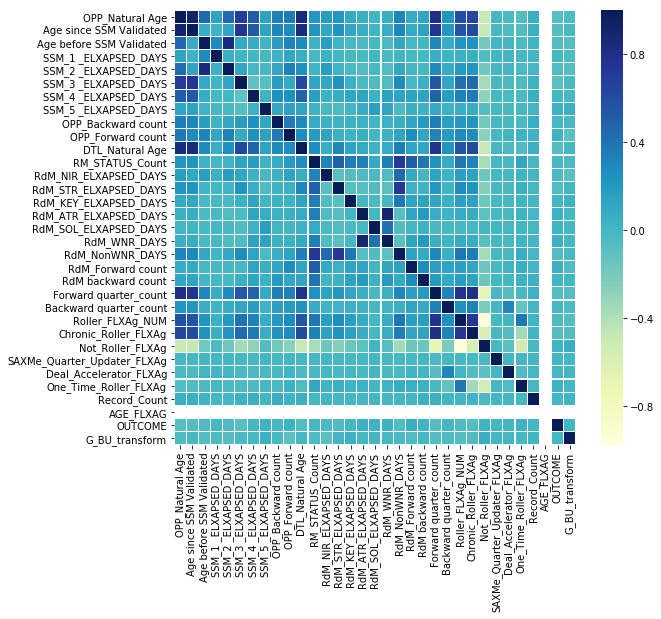

In [29]:
corrmat = df_data_train.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

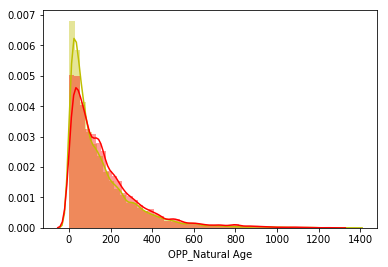

In [30]:
#Checking how high correlated data varies by different outcome/target for Opp natural age
sns.distplot(df_data_train['OPP_Natural Age'][df_data_train['OUTCOME'] == 1],color= 'y')
sns.distplot(df_data_train['OPP_Natural Age'][df_data_train['OUTCOME'] == 0], color='r')

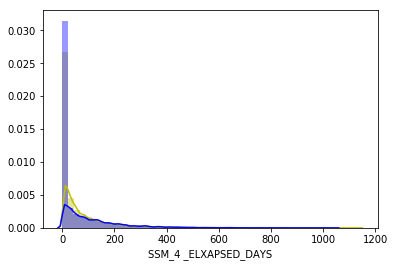

In [34]:
#Checking how least correlated data varies by different outcome/target for 'SSM_4 _ELXAPSED_DAYS'
sns.distplot(df_data_train['SSM_4 _ELXAPSED_DAYS'][df_data_train['OUTCOME'] == 1],color= 'y')
sns.distplot(df_data_train['SSM_4 _ELXAPSED_DAYS'][df_data_train['OUTCOME'] == 0], color='b')

In [ ]:
#Lets create a balanced data for training i.e select rows with equal number of '1' and '0'outcome/Target.

In [41]:
#Rows with 1 outcome is: 51113
#Rows with 0 outcome is: 28864
#df_data_train_b = df_data_train[df_data_train['OUTCOME'] == 1].drop

# Separate majority and minority classes
df_maj = df_data_train[df_data_train['OUTCOME'] == 1]
df_min = df_data_train[df_data_train['OUTCOME'] == 0]
 
# Downsample majority class
df_maj_ds = resample(df_maj, 
                                 replace=False,    # sample without replacement
                                 n_samples=28864,     # to match minority class
                                 random_state=111) # reproducible results
 
# Combine minority class with downsampled majority class
df_data_train_b = pd.concat([df_maj_ds, df_min])


<bound method DataFrame.count of         OPP_Natural Age  Age since SSM Validated  Age before SSM Validated  \
133326               23                       23                         0   
139736              170                      170                         0   
74390               212                      205                         7   
153144               85                       85                         0   
35449               253                      253                         0   
32921               260                      260                         0   
46261                28                       28                         0   
114993              212                      212                         0   
156250              320                      320                         0   
47317                16                        2                        14   
41672               229                      229                         0   
26125               280        

In [42]:
#Lets check for the distribution of target/outcome after performing data balancing
a = df_data_train_b[df_data_train_b['OUTCOME'] == 1].count()[1]
b = df_data_train_b[df_data_train_b['OUTCOME'] == 0].count()[1]
a1 = a/(a+b)*100
b1 = b/(a+b)*100
print('Rows with 1 outcome is:', a)
print('Rows with 0 outcome is:', b)
print('Percentage of rows with 1 outcome is:', round(a1),'%')
print('Percentage of rows with 0 outcome is:', round(b1),'%')

Rows with 1 outcome is: 28864
Rows with 0 outcome is: 28864
Percentage of rows with 1 outcome is: 50.0 %
Percentage of rows with 0 outcome is: 50.0 %
